In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from tabulate import tabulate
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [3]:
# Sample dataset
dataset = ["I love playing football on the weekends",
           "I enjoy hiking and camping in the mountains",
           "I like to read books and watch movies",
           "I prefer playing video games over sports",
           "I love listening to music and going to concerts"]

In [5]:
# Step 3: Preprocessing
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    # Remove non-alphabetic characters and lowercase
    text = re.sub(r'[^a-zA-Z]', ' ', text.lower())
    # Tokenize
    tokens = text.split()
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join tokens back into a string
    return ' '.join(tokens)

preprocessed_dataset = [preprocess(doc) for doc in dataset]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\isyaz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\isyaz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
preprocessed_dataset

['love playing football weekend',
 'enjoy hiking camping mountain',
 'like read book watch movie',
 'prefer playing video game sport',
 'love listening music going concert']

In [9]:
# Vectorize the dataset
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_dataset)

In [17]:
# Define the number of clusters
k = 2

In [19]:
# Create a k-means model and fit it to the data
km = KMeans(n_clusters=k)
km.fit(X)

KMeans(n_clusters=2)

In [25]:
# Predict the clusters for each document
y_pred = km.predict(X)

In [27]:
# Display the document and its predicted cluster in a table
table_data = [["Document", "Predicted Cluster"]]
table_data.extend([[doc, cluster] for doc, cluster in zip(dataset, y_pred)])
print(tabulate(table_data, headers="firstrow"))

Document                                           Predicted Cluster
-----------------------------------------------  -------------------
I love playing football on the weekends                            1
I enjoy hiking and camping in the mountains                        0
I like to read books and watch movies                              1
I prefer playing video games over sports                           1
I love listening to music and going to concerts                    1


In [29]:
# Print top terms per cluster
print("\nTop terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print()


Top terms per cluster:
Cluster 0:
 camping
 enjoy
 hiking
 mountain
 weekend
 listening
 concert
 football
 game
 going

Cluster 1:
 love
 playing
 football
 weekend
 going
 sport
 music
 concert
 video
 game



In [31]:
# Calculate purity
total_samples = len(y_pred)
cluster_label_counts = [Counter(y_pred)]
purity = sum(max(cluster.values()) for cluster in cluster_label_counts) / total_samples

print("Purity:", purity)

Purity: 0.8


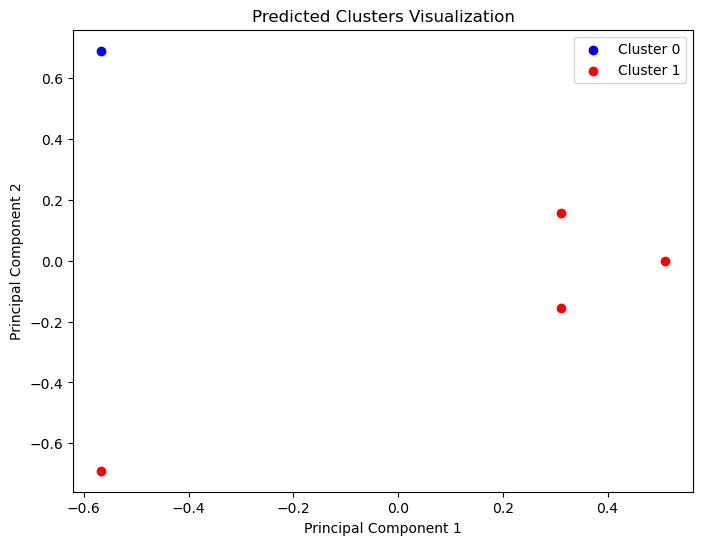

In [33]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Reduce dimensionality using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plot the predicted clusters
plt.figure(figsize=(8, 6))
colors = ['blue', 'red']
for i in range(k):
    plt.scatter(X_pca[y_pred == i, 0], X_pca[y_pred == i, 1], c=colors[i], label=f'Cluster {i}')
plt.title('Predicted Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()